### NMF (음수 미포함 행렬 분해)
인위적 데이터에 NMF 적용하기

PCA처럼 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘

- 차원 축소에도 사용할 수 있음
- PCA에서는 데이터이 분산이 가장 크고 수직인 성분을 찾았다면
- NMF에서는 `음수가 아닌 성분`과 `계수`값을 찾음
- 즉, 주성분과 계수가 모두 0 이상이어야 함
- 목소리 같은 재질에 쓰임

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from IPython import display
import mglearn
from sklearn.model_selection import train_test_split

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

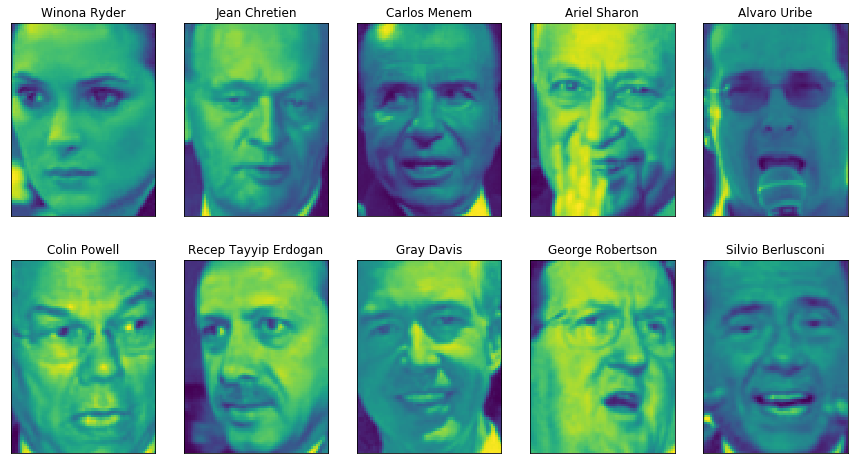

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
        
# 편중을 막기위해 각 사람마다 50개의 사진만 추출

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.


from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

In [3]:
########## 데이터셋 준비 ###########

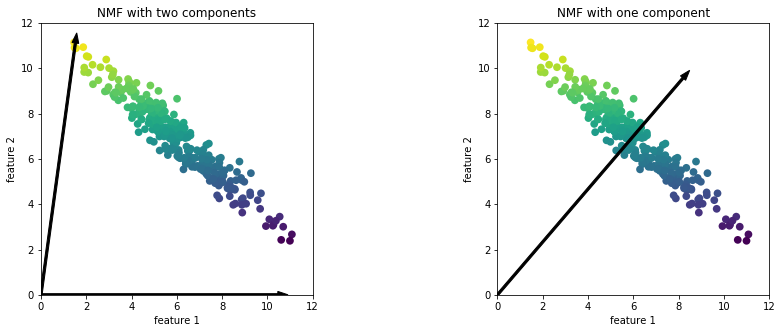

In [4]:
mglearn.plots.plot_nmf_illustration()

특성이 2개 이상 -> 구분할 수 있는 양쪽

특성이 1개 -> 평균값을 향해

### 얼굴 이미지에 NMF 적용하기

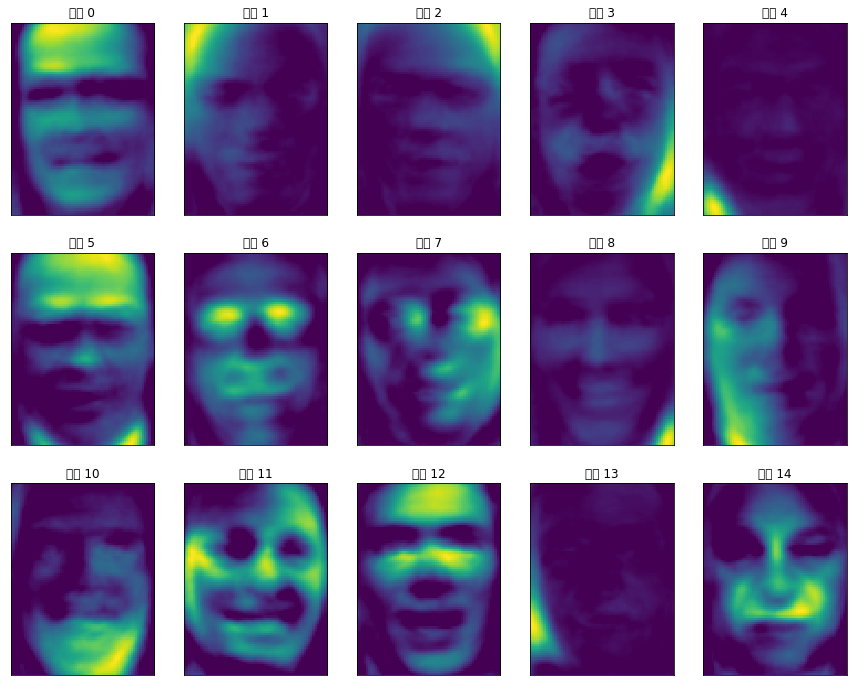

In [5]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

성분들이 다 양수값이니까 좀 둥그렇게 나옵니다

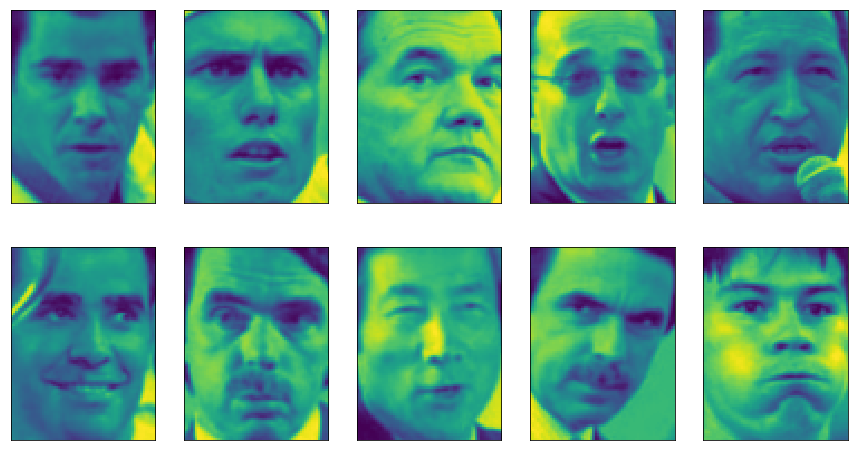

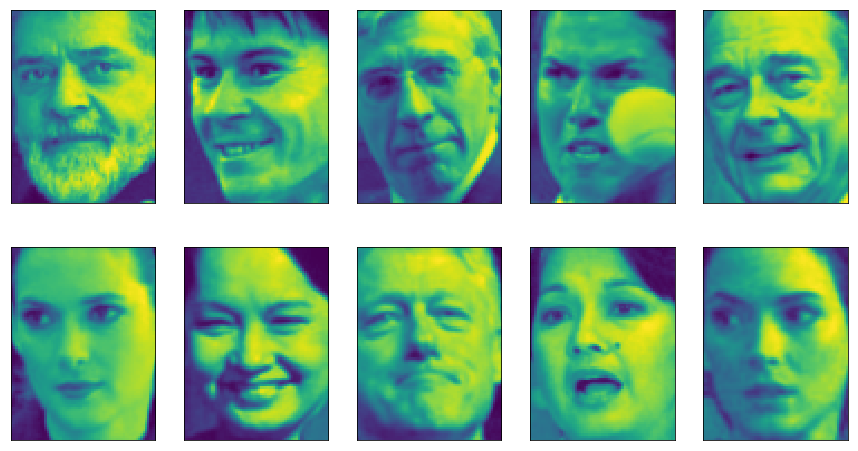

In [6]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

성분 3, 7로 채택해서 봤을 때 오른쪽, 왼쪽으로 돌아간 모습 볼 수 있음

### 이런식으로 유추해서 패턴을 추측할 수 있다!

소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합

인위적인 데이터셋을 사용한 예를 통해서 살펴보면,

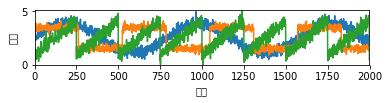

In [7]:
# 3개의 서로 다른 입력으로부터 합성된 신호
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

3개의 합쳐진 신호를 복원해서 원본 신호를 나타내보자

In [9]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [10]:
# NMF를 사용해 3개의 신호를 복원

In [11]:
nmf = NMF(n_components=3, random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

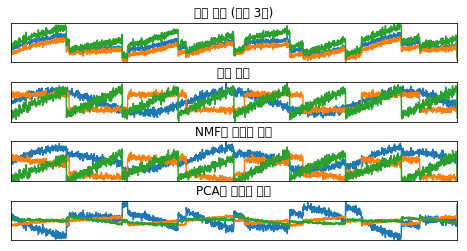

In [14]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)',
         '원본 신호',
         'NMF로 복원한 신호', 
         'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)